In [1]:
import pandas as pd
import numpy as np

In [3]:
dataset=pd.read_csv("heart disease.csv")

In [5]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1888 non-null   int64  
 1   sex       1888 non-null   int64  
 2   cp        1888 non-null   int64  
 3   trestbps  1888 non-null   int64  
 4   chol      1888 non-null   int64  
 5   fbs       1888 non-null   int64  
 6   restecg   1888 non-null   int64  
 7   thalachh  1888 non-null   int64  
 8   exang     1888 non-null   int64  
 9   oldpeak   1888 non-null   float64
 10  slope     1888 non-null   int64  
 11  ca        1888 non-null   int64  
 12  thal      1888 non-null   int64  
 13  target    1888 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 206.6 KB


In [9]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,54.354343,0.688559,1.279131,131.549258,246.855403,0.148305,0.597458,149.424258,0.331568,1.053761,1.421610,0.731462,2.662606,0.517479
std,9.081505,0.463205,1.280877,17.556985,51.609329,0.355496,0.638820,23.006153,0.470901,1.161344,0.619588,1.015735,1.249924,0.499827
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.750000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,241.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,276.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,7.000000,1.000000


In [11]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalachh    0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


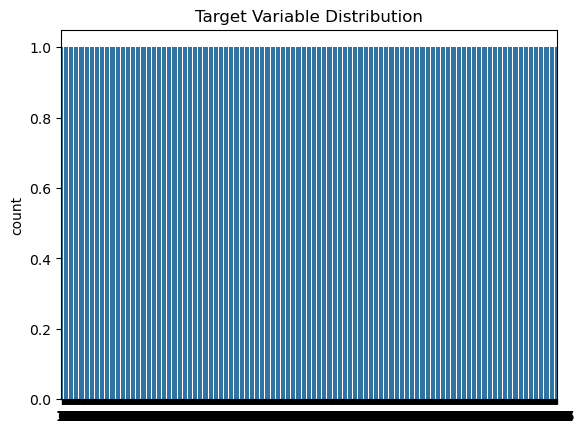

In [15]:
# Distribution of the target variable
sns.countplot(dataset['target'])
plt.title('Target Variable Distribution')
plt.show()

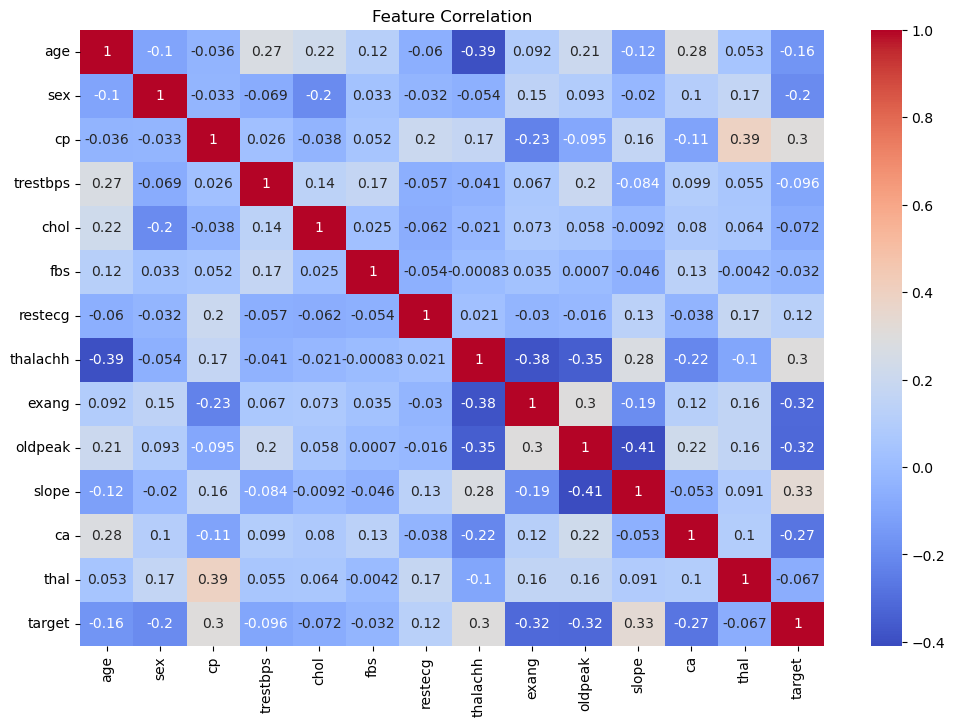

In [17]:
# Correlation matrix
correlation_matrix = dataset.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

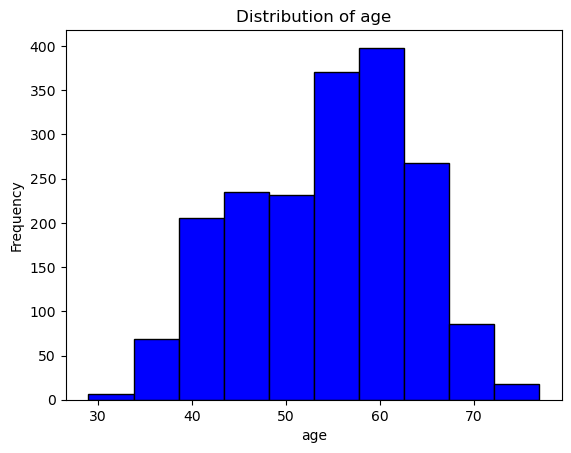

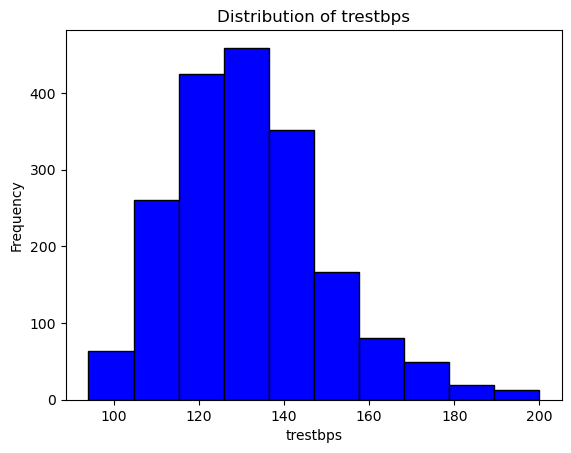

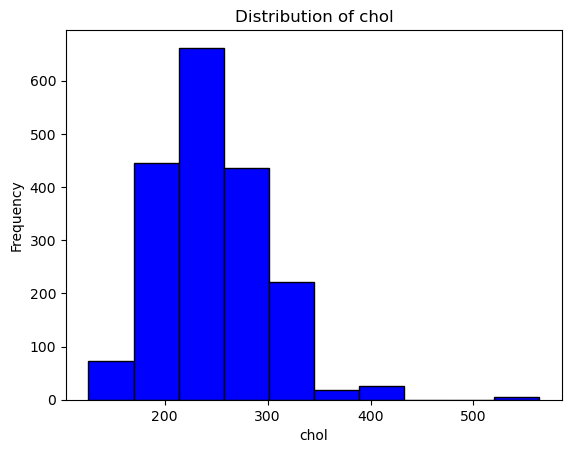

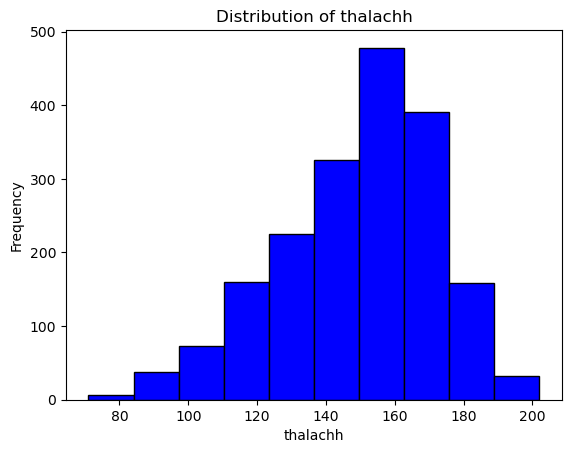

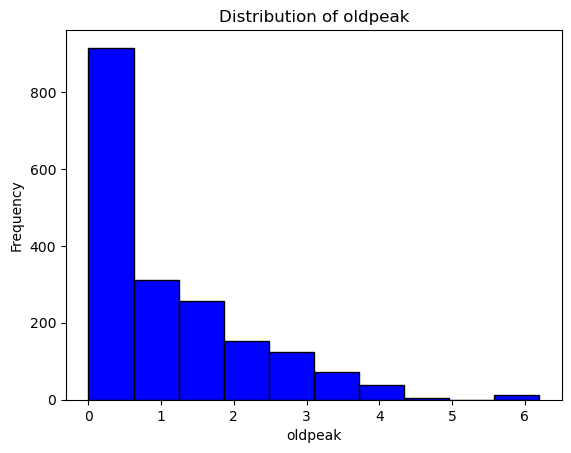

In [19]:
numerical_columns = ['age', 'trestbps', 'chol', 'thalachh', 'oldpeak']
for col in numerical_columns:
    plt.hist(dataset[col], bins=10, color='blue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

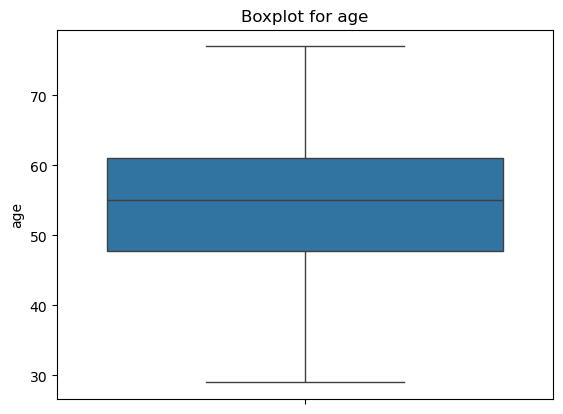

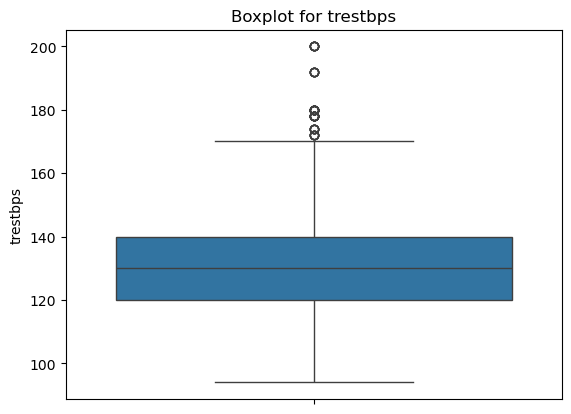

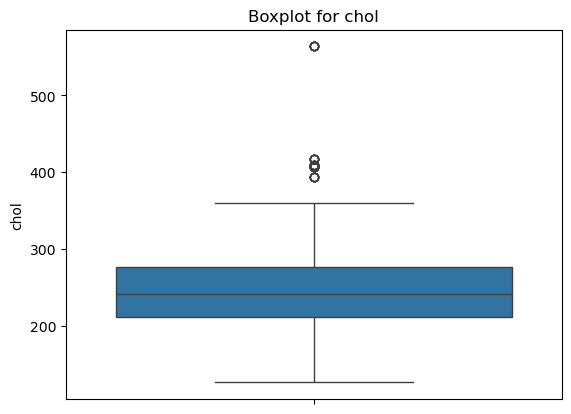

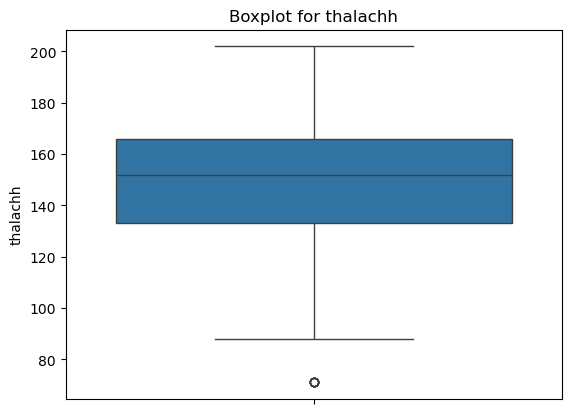

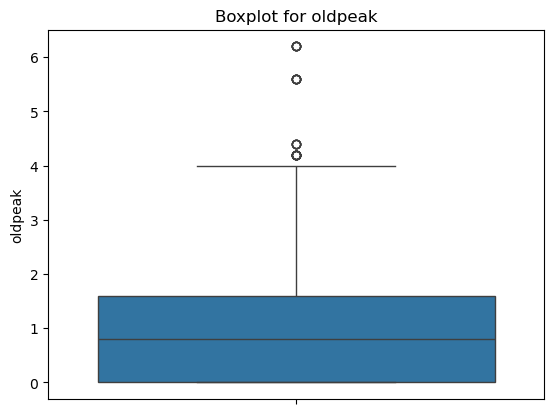

In [21]:
for col in numerical_columns:
    sns.boxplot(dataset[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

In [23]:
#Handle categorical variables

dataset = pd.get_dummies(dataset, columns=['cp', 'thal', 'slope'], drop_first=True)


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_columns = ['age', 'trestbps', 'chol', 'thalachh', 'oldpeak']
dataset[numerical_columns] = scaler.fit_transform(dataset[numerical_columns])

In [27]:
dataset.fillna(dataset.mean(), inplace=True)

In [29]:
#split the dataset into train and test sgetpass

from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)  # Features
y = dataset['target']              # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [31]:
#Train a decison tree classifiter

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate Performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.9153439153439153
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91       188
           1       0.91      0.92      0.92       190

    accuracy                           0.92       378
   macro avg       0.92      0.92      0.92       378
weighted avg       0.92      0.92      0.92       378



In [33]:
#Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_





Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [37]:
y_pred_optimized = best_model.predict(X_test)
accuracy_score(y_test, y_pred_optimized)
classification_report(y_test, y_pred_optimized)


'              precision    recall  f1-score   support\n\n           0       0.95      0.93      0.94       188\n           1       0.93      0.95      0.94       190\n\n    accuracy                           0.94       378\n   macro avg       0.94      0.94      0.94       378\nweighted avg       0.94      0.94      0.94       378\n'

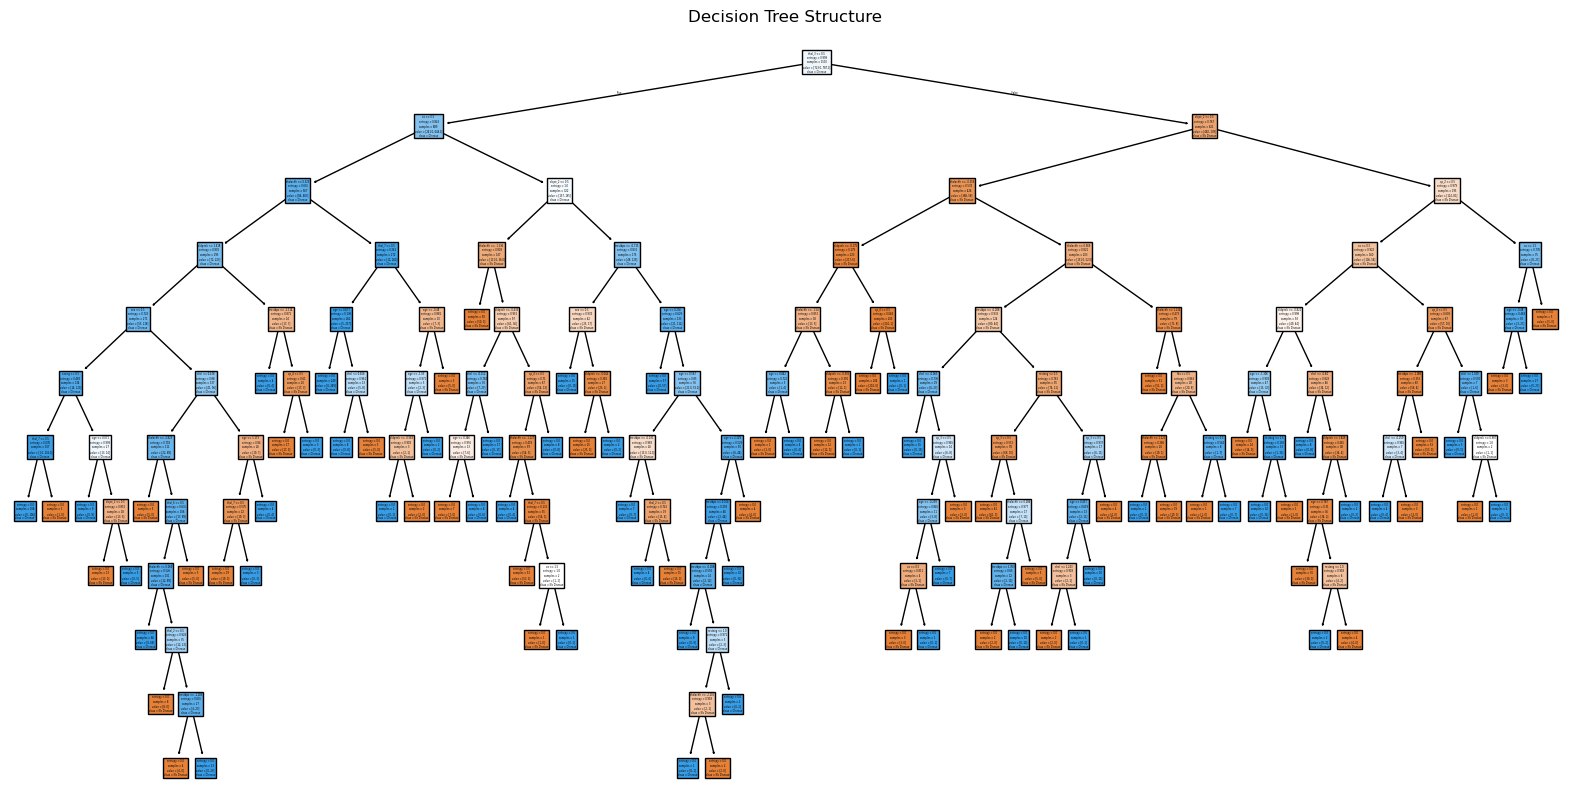

In [39]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=['No Disease', 'Disease'])
plt.title("Decision Tree Structure")
plt.show()


     Feature  Importance
16    thal_3    0.187144
6   thalachh    0.132703
0        age    0.119343
9         ca    0.077462
20   slope_2    0.075981
2   trestbps    0.072332
8    oldpeak    0.062773
3       chol    0.053759
13      cp_4    0.039496
18    thal_7    0.034794
1        sex    0.028182
12      cp_3    0.025758
5    restecg    0.021089
15    thal_2    0.020046
7      exang    0.019612
11      cp_2    0.010758
17    thal_6    0.009425
4        fbs    0.009344
14    thal_1    0.000000
10      cp_1    0.000000
19   slope_1    0.000000
21   slope_3    0.000000


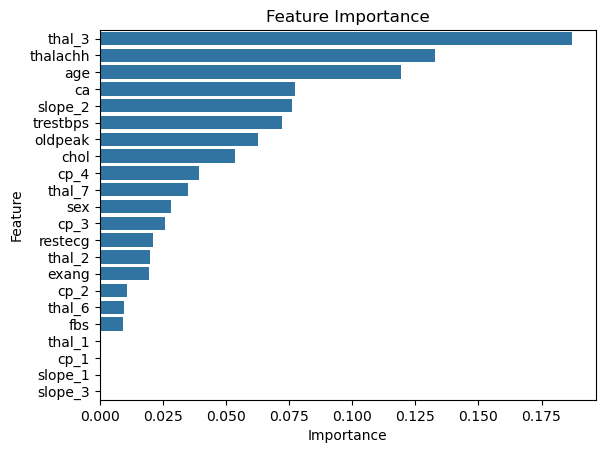

In [41]:
importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# Plot feature importance
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()
